In [ ]:
!pip install evidently

In [ ]:
!pip install --upgrade PyCaret

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
!pip install explainerdashboard

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
agri_data=pd.read_excel('/content/drive/MyDrive/Agri/FPData v1.2.xlsx')
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59


In [ ]:
agri_data.dtypes

Date             datetime64[ns]
COMM_NAME                object
COMM_CODE                 int64
COMM_CATEGORY            object
COMM_WT                 float64
Monthly Price           float64
Rainfall                float64
dtype: object

In [ ]:
# extract month and year from dates
agri_data['Month'] = [i.month for i in agri_data['Date']]
agri_data['year'] = [i.year for i in agri_data['Date']]
#agri_data['flag'] = pd.Series(np.where(agri_data['Date'] >= np.datetime64('2020-03-03'), 1, 0)) #flag for COVID-19
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59,4,2011
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59,4,2011
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59,4,2011
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59,4,2011
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59,4,2011


In [ ]:
agri_data.columns

Index(['Date', 'COMM_NAME', 'COMM_CODE', 'COMM_CATEGORY', 'COMM_WT',
       'Monthly Price', 'Rainfall', 'Month', 'year'],
      dtype='object')

In [ ]:
target='Monthly Price'

In [ ]:
#agri_data = agri_data.drop(columns=['COMM_CODE'])
#agri_data.columns

In [ ]:
#agri_data = agri_data.drop(columns=['COMM_WT'])
#agri_data.columns

In [ ]:
agri_data.set_index('Date', inplace=True)
agri_data.head()

,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year
Date,,,,,,,,
2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,40.59,4,2011
2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,40.59,4,2011
2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,40.59,4,2011
2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,40.59,4,2011
2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,40.59,4,2011


In [ ]:
# Filtering out records in the dataframe with NULLs in Monthly Price
unknown_price_df=agri_data[agri_data['Monthly Price'].isna()]
# Filtering out records for June, 2021 to create a forecast dataframe
forecast_agri_df=unknown_price_df[(unknown_price_df['year']>2021) |((unknown_price_df['year']==2021) & (unknown_price_df['Month']>6))]
forecast_agri_index=forecast_agri_df.index  #indexes of the records in forecast dataframe
#Eliminating the records that need to be appear in forecast data from training data
agri_data=agri_data.drop(index=forecast_agri_index)

In [ ]:
# split data into train-test set
train = agri_data[agri_data['year'] < 2020]
test = agri_data[agri_data['year'] >= 2020]
#check shape
train.shape, test.shape

((7140, 8), (1224, 8))

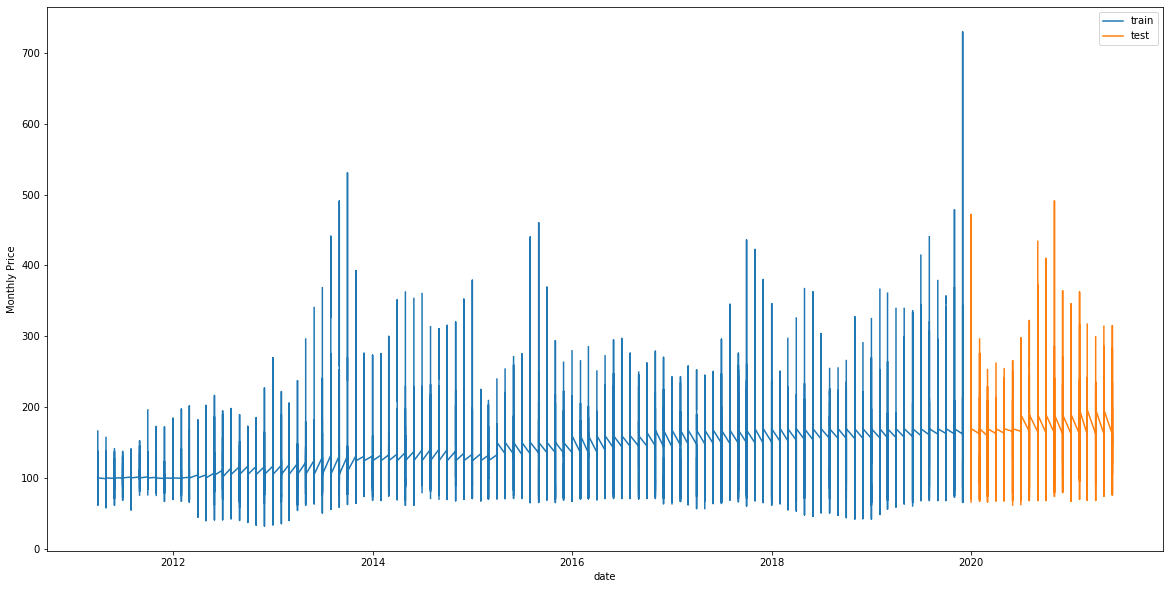

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('Monthly Price')
plt.plot(train.index,train['Monthly Price'],label='train')
plt.plot(test.index,test['Monthly Price'],label='test')
plt.legend()
plt.show()

In [ ]:
train.columns

Index(['COMM_NAME', 'COMM_CODE', 'COMM_CATEGORY', 'COMM_WT', 'Monthly Price',
       'Rainfall', 'Month', 'year'],
      dtype='object')

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
reg = setup(data = train, 
             target = 'Monthly Price',
             numeric_imputation = 'mean',
             categorical_features = ['COMM_NAME','Month','year','COMM_CATEGORY'], use_gpu=True, combine_rare_levels = True, rare_level_threshold = 0.1,ignore_features=['COMM_CODE','COMM_WT'],
             silent = True,remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            data_split_shuffle = False,log_experiment = True,experiment_name='Midreview_1',log_plots = True,log_data = True)

,Description,Value
0,session_id,1212
1,Target,Monthly Price
2,Original Data,"(7140, 8)"
3,Missing Values,True
4,Numeric Features,1
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4778, 57)"


In [ ]:
#!pip install autoviz

In [ ]:
#eda()

In [ ]:
# returns best models - takes a little time to run
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,22.9225,1.109812e+03,32.6674,0.1116,0.2360,0.1859,1.041
gbr,Gradient Boosting Regressor,23.8860,1.203903e+03,33.8808,0.0750,0.2456,0.1957,0.468
lightgbm,Light Gradient Boosting Machine,23.2975,1.152777e+03,33.3408,0.0456,0.2399,0.1886,0.088
rf,Random Forest Regressor,23.6428,1.231509e+03,34.4390,-0.0052,0.2462,0.1910,1.527
br,Bayesian Ridge,25.2130,1.311914e+03,35.5610,-0.0553,0.2587,0.2060,0.045
ridge,Ridge Regression,25.2824,1.313938e+03,35.6223,-0.0668,0.2596,0.2065,0.019
lr,Linear Regression,25.3085,1.315143e+03,35.6489,-0.0709,0.2600,0.2067,0.053
huber,Huber Regressor,25.1761,1.433455e+03,36.7588,-0.0775,0.2626,0.1958,0.442
omp,Orthogonal Matching Pursuit,26.5529,1.446755e+03,37.1130,-0.0985,0.2691,0.2182,0.016
et,Extra Trees Regressor,25.5252,1.579462e+03,39.0274,-0.3215,0.2693,0.2046,1.672


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,22.9225,1.109812e+03,32.6674,0.1116,0.2360,0.1859,1.015
lightgbm,Light Gradient Boosting Machine,23.2975,1.152777e+03,33.3408,0.0456,0.2399,0.1886,0.089
gbr,Gradient Boosting Regressor,23.8860,1.203903e+03,33.8808,0.0750,0.2456,0.1957,0.461
rf,Random Forest Regressor,23.6428,1.231509e+03,34.4390,-0.0052,0.2462,0.1910,1.535
br,Bayesian Ridge,25.2130,1.311914e+03,35.5610,-0.0553,0.2587,0.2060,0.053
ridge,Ridge Regression,25.2824,1.313938e+03,35.6223,-0.0668,0.2596,0.2065,0.033
lr,Linear Regression,25.3085,1.315143e+03,35.6489,-0.0709,0.2600,0.2067,0.039
huber,Huber Regressor,25.1761,1.433455e+03,36.7588,-0.0775,0.2626,0.1958,0.366
omp,Orthogonal Matching Pursuit,26.5529,1.446755e+03,37.1130,-0.0985,0.2691,0.2182,0.016
et,Extra Trees Regressor,25.5252,1.579462e+03,39.0274,-0.3215,0.2693,0.2046,1.692


In [ ]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.9049,596.8264,24.4300,-1.0400,0.1992,0.1457
1,16.3442,526.4468,22.9444,-0.0380,0.2122,0.1670
2,18.0115,622.2907,24.9458,0.1916,0.2374,0.1852
3,22.3375,1065.8534,32.6474,0.4844,0.2444,0.2033
4,26.0166,1483.0331,38.5102,0.2948,0.2569,0.2017
5,26.3004,1475.0310,38.4061,0.2586,0.2464,0.1798
6,24.0563,1173.4163,34.2552,0.1694,0.2289,0.1783
7,27.1494,1502.9994,38.7685,0.1948,0.2469,0.1982
8,27.6892,1588.6744,39.8582,-0.0021,0.2525,0.1950
9,30.1645,1493.2032,38.6420,-0.0572,0.2741,0.2319


In [ ]:
tuned_lightgbm = tune_model(lightgbm) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.2055,536.5620,23.1638,-0.8340,0.2096,0.1631
1,16.6850,561.7850,23.7020,-0.1077,0.2171,0.1686
2,18.1720,693.2721,26.3301,0.0994,0.2463,0.1895
3,22.9241,1156.1665,34.0024,0.4407,0.2480,0.2022
4,25.9471,1426.2472,37.7657,0.3218,0.2562,0.2062
5,26.6862,1485.3090,38.5397,0.2534,0.2522,0.1845
6,23.9223,1256.5419,35.4477,0.1106,0.2283,0.1729
7,26.8695,1543.6779,39.2897,0.1730,0.2490,0.1964
8,27.4319,1520.2314,38.9901,0.0410,0.2492,0.1896
9,30.5289,1619.5365,40.2435,-0.1467,0.2800,0.2294


In [ ]:
dashboard(lightgbm, display_format='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,34.744,2742.0324,52.3644,0.0492,0.3148,0.2447


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [ ]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.4, max_depth=-1,
              min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=100, n_jobs=-1, num_leaves=8, objective=None,
              random_state=1212, reg_alpha=0.1, reg_lambda=0.3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,27.9686,1638.0965,40.4734,0.432,0.2713,0.2143


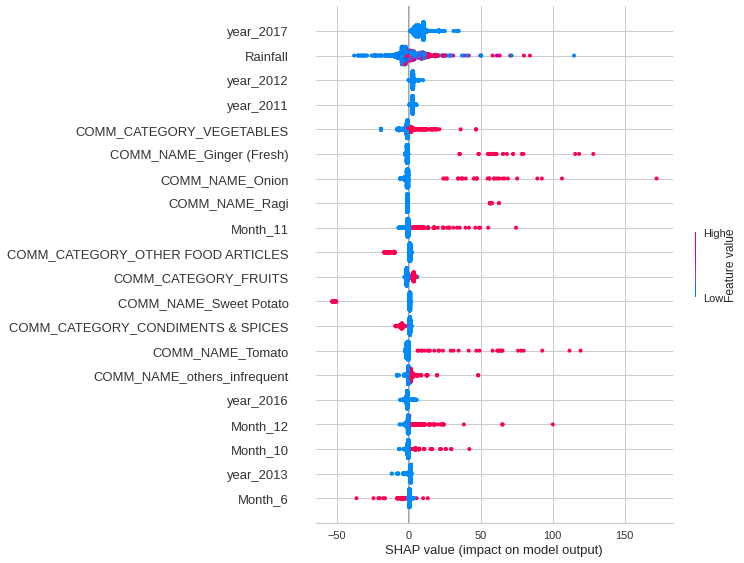

In [ ]:
interpret_model(final_lightgbm)

In [ ]:
#Appending the test and forecast data
test=test.reset_index()
forecast_agri_df=forecast_agri_df.reset_index()
forecast_agri_df=forecast_agri_df.append(test,ignore_index=True)
#Sorting the forecast data by Date
forecast_agri_df=forecast_agri_df.sort_values(by='Date')
# Setting Date column as index to the forecast data
forecast_agri_df=forecast_agri_df.set_index('Date')

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=forecast_agri_df)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 #removing any negative values

In [ ]:
## 22-01-2022: Changes by Anuraag
# Forecast Output from 2020-01-01 to 2023-03-01
# Label column denotes the forecasted prices
unseen_predictions[['COMM_NAME','COMM_CATEGORY','Monthly Price','Label']]

,COMM_NAME,COMM_CATEGORY,Monthly Price,Label
Date,,,,
2020-01-01,Sugarcane,OTHER FOOD ARTICLES,169.5,126.096213
2020-01-01,Apple,FRUITS,91.6,143.391073
2020-01-01,Orange,FRUITS,111.6,143.391073
2020-01-01,Cashew nut,FRUITS,163.7,143.391073
2020-01-01,Coconut (Fresh),FRUITS,210.7,143.391073
...,...,...,...,...
2023-03-01,Tomato,VEGETABLES,NaN,217.112395
2023-03-01,Peas (Green),VEGETABLES,NaN,140.319781
2023-03-01,Tapioca,VEGETABLES,NaN,158.903958


In [ ]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("Date")
    plt.ylabel("Monthly Price (Rupees)")
    plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

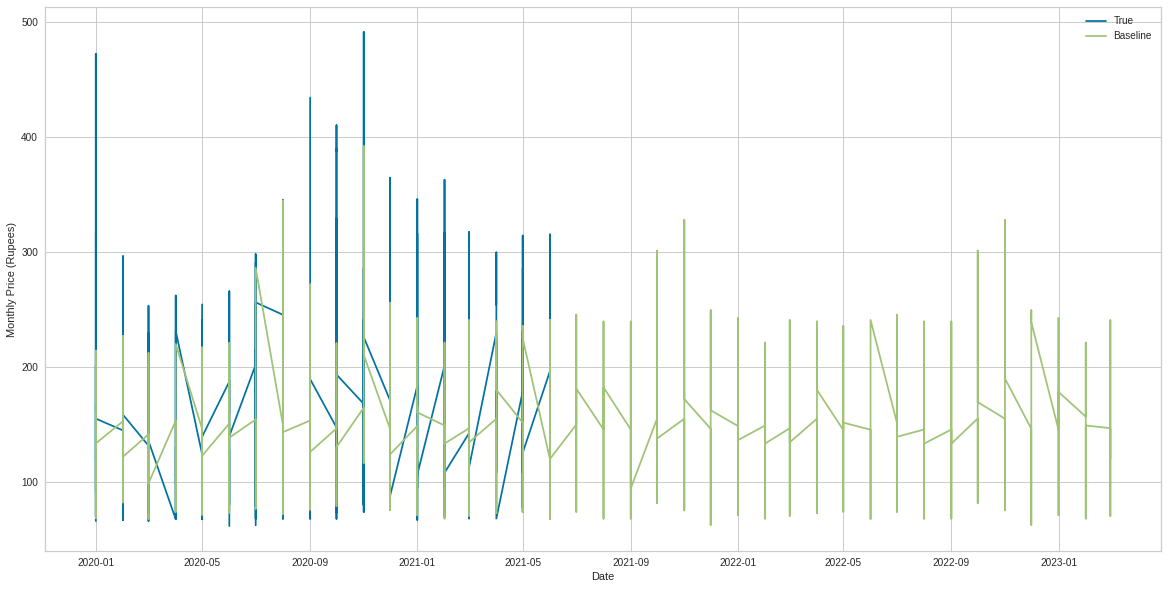

In [ ]:
plt.figure(figsize=(20,10))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
#plot_series(train['ds'],train['y'])
plot_series(forecast_agri_df.index, unseen_predictions['Label'],"Baseline")


In [ ]:
gbr = create_model('gbr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
br=create_model('br', verbose = False)

In [ ]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.5628,543.2570,23.3079,-0.8569,0.2127,0.1641
1,16.9760,594.5687,24.3838,-0.1723,0.2218,0.1698
2,20.2432,805.0185,28.3728,-0.0457,0.2595,0.2139
3,24.0192,1150.5014,33.9190,0.4434,0.2593,0.2201
4,26.5238,1509.3754,38.8507,0.2823,0.2600,0.2107
5,26.3919,1487.4694,38.5677,0.2523,0.2428,0.1800
6,22.7806,1098.7566,33.1475,0.2223,0.2215,0.1686
7,26.6484,1387.4313,37.2482,0.2567,0.2447,0.1989
8,27.7065,1522.0896,39.0140,0.0399,0.2526,0.1898
9,29.1561,1423.3328,37.7271,-0.0078,0.2683,0.2177


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.2055,536.5620,23.1638,-0.8340,0.2096,0.1631
1,16.6850,561.7850,23.7020,-0.1077,0.2171,0.1686
2,18.1720,693.2721,26.3301,0.0994,0.2463,0.1895
3,22.9241,1156.1665,34.0024,0.4407,0.2480,0.2022
4,25.9471,1426.2472,37.7657,0.3218,0.2562,0.2062
5,26.6862,1485.3090,38.5397,0.2534,0.2522,0.1845
6,23.9223,1256.5419,35.4477,0.1106,0.2283,0.1729
7,26.8695,1543.6779,39.2897,0.1730,0.2490,0.1964
8,27.4319,1520.2314,38.9901,0.0410,0.2492,0.1896
9,30.5289,1619.5365,40.2435,-0.1467,0.2800,0.2294


In [ ]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.4477,500.6264,22.3747,-0.7111,0.2132,0.1639
1,19.2310,767.3447,27.7010,-0.5130,0.2538,0.1886
2,19.9911,731.1849,27.0404,0.0502,0.2628,0.2174
3,26.0173,1575.3309,39.6904,0.2379,0.2748,0.2282
4,28.0169,1763.8689,41.9984,0.1612,0.2721,0.2182
5,27.8127,1614.6176,40.1823,0.1884,0.2540,0.1975
6,24.2282,1193.9288,34.5533,0.1549,0.2327,0.1801
7,28.6877,1622.3526,40.2784,0.1309,0.2604,0.2161
8,28.3016,1545.1396,39.3083,0.0253,0.2605,0.2010
9,33.3958,1804.7475,42.4823,-0.2778,0.3025,0.2487


In [ ]:
blend_specific = blend_models(estimator_list = [tuned_lightgbm,tuned_gbr,tuned_br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.7651,483.2822,21.9837,-0.6519,0.2045,0.1573
1,16.6843,589.9840,24.2896,-0.1633,0.2219,0.1667
2,18.6381,675.5344,25.9910,0.1225,0.2491,0.2002
3,22.9967,1120.6893,33.4767,0.4579,0.2490,0.2079
4,26.4027,1488.1535,38.5766,0.2924,0.2570,0.2090
5,26.0943,1417.9979,37.6563,0.2872,0.2411,0.1816
6,22.6845,1089.6821,33.0103,0.2287,0.2203,0.1676
7,26.6445,1450.9774,38.0917,0.2227,0.2453,0.1984
8,27.2901,1453.1818,38.1206,0.0833,0.2473,0.1894
9,30.5628,1553.1318,39.4098,-0.0997,0.2793,0.2285


In [ ]:
predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,34.083,2615.1734,51.1388,0.0932,0.3083,0.2436


,Rainfall,COMM_NAME_Arhar,COMM_NAME_Bajra,COMM_NAME_Barley,COMM_NAME_Beans,COMM_NAME_Bitter gourd,COMM_NAME_Bottle gourd,COMM_NAME_Brinjal,COMM_NAME_Cabbage,COMM_NAME_Carrot,COMM_NAME_Cucumber,COMM_NAME_Ginger (Fresh),COMM_NAME_Gram,COMM_NAME_Jowar,COMM_NAME_Maize,COMM_NAME_Masur,COMM_NAME_Moong,COMM_NAME_Okra (Lady finger),COMM_NAME_Onion,COMM_NAME_Paddy,COMM_NAME_Peas/Chawali,COMM_NAME_Pointed gourd,COMM_NAME_Potato,COMM_NAME_Pumpkin,COMM_NAME_Radish,COMM_NAME_Ragi,COMM_NAME_Rajma,COMM_NAME_Sweet Potato,COMM_NAME_Tapioca,COMM_NAME_Tomato,COMM_NAME_Urad,COMM_NAME_Wheat,COMM_NAME_others_infrequent,COMM_CATEGORY_CEREALS,COMM_CATEGORY_CONDIMENTS & SPICES,COMM_CATEGORY_FRUITS,COMM_CATEGORY_OTHER FOOD ARTICLES,COMM_CATEGORY_PULSES,COMM_CATEGORY_VEGETABLES,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_others_infrequent,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,Monthly Price,Label
0,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,112.800003,128.843472
1,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,159.899994,136.772374
2,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,107.099998,136.772374
3,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140.600006,136.772374
4,28.469999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,126.500000,136.772374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,156.399994,136.999121
2040,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,131.800003,135.584017
2041,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,95.099998,135.584017
2042,9.230000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.199997,135.584017


In [ ]:
final_model = finalize_model(blend_specific)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [ ]:
unseen_predictions_2 = predict_model(final_model, data=forecast_agri_df, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head()

,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Rainfall,Month,year,Label
Date,,,,,,,,,
2020-01-01,Sugarcane,1101060004,OTHER FOOD ARTICLES,0.58142,169.5,24.36,1,2020,125.828438
2020-01-01,Apple,1101020203,FRUITS,0.07505,91.6,24.36,1,2020,142.065886
2020-01-01,Orange,1101020204,FRUITS,0.12653,111.6,24.36,1,2020,142.065886
2020-01-01,Cashew nut,1101020205,FRUITS,0.06583,163.7,24.36,1,2020,142.065886
2020-01-01,Coconut (Fresh),1101020206,FRUITS,0.07873,210.7,24.36,1,2020,142.065886


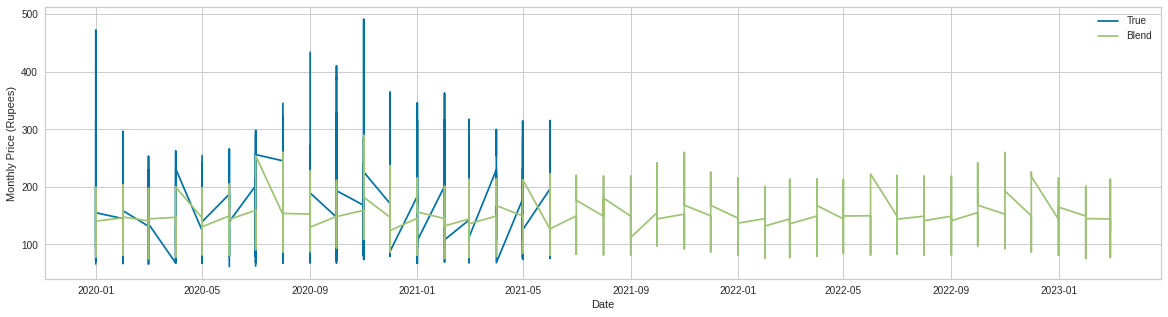

In [ ]:
plt.figure(figsize=(20,5))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
plot_series(forecast_agri_df.index, unseen_predictions_2['Label'],'Blend')

In [ ]:
stack_1 = stack_models([tuned_lightgbm,tuned_gbr,tuned_br])
predict_model(stack_1);
final_stack_1 = finalize_model(stack_1)
unseen_predictions_3 = predict_model(final_stack_1, data=forecast_agri_df, round=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.238856e+02,1.585061e+04,1.258992e+02,-5.317740e+01,0.8186,1.273400e+00
1,4.663900e+01,3.949411e+03,6.284430e+01,-6.787000e+00,0.4602,4.974000e-01
2,1.881970e+01,6.845548e+02,2.616400e+01,1.107000e-01,0.2498,2.014000e-01
3,2.284850e+01,1.172996e+03,3.424900e+01,4.325000e-01,0.2438,1.978000e-01
4,3.137990e+01,1.947532e+03,4.413080e+01,7.390000e-02,0.3133,2.310000e-01
5,2.937180e+01,1.869492e+03,4.323760e+01,6.030000e-02,0.2802,1.871000e-01
6,2.970080e+01,1.715300e+03,4.141620e+01,-2.141000e-01,0.2885,1.988000e-01
7,3.478350e+01,2.471479e+03,4.971400e+01,-3.240000e-01,0.3288,2.277000e-01
8,5.252500e+01,3.890656e+03,6.237510e+01,-1.454200e+00,0.4619,3.302000e-01
9,7.334365e+10,8.668655e+21,9.310561e+10,-6.137728e+18,16.2299,5.734664e+08


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,53.9037,5146.3574,71.7381,-0.7845,0.488,0.3276


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

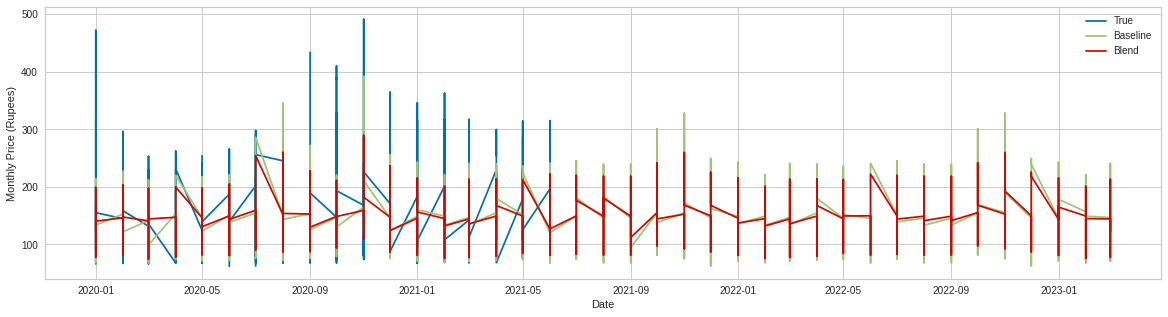

In [ ]:
plt.figure(figsize=(20,5))
plot_series(forecast_agri_df.index, forecast_agri_df['Monthly Price'],"True")
plot_series(forecast_agri_df.index, unseen_predictions['Label'],'Baseline')
plot_series(forecast_agri_df.index, unseen_predictions_2['Label'],'Blend')

In [ ]:
!pip install fastapi

In [ ]:
!pip install uvicorn

In [ ]:
!pip install gradio

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [ ]:
create_api(final_lightgbm, 'my_first_api')
# Run the API
!python my_first_api.py


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python my_first_api.py
    
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [2570]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)



[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)



[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)



[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)



[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
create_docker('my_first_docker')

In [ ]:
# select best model 
best2 = automl(optimize = 'RMSE')

In [ ]:
best2

In [ ]:
best_model_results = pull()

In [ ]:
best_model_results

In [ ]:
create_app(lightgbm)

In [ ]:
!pip install mlflow ui
!pip install mlflow
# run mlflow server (notebook)
#!mlflow ui

In [ ]:
logs = get_logs(save=True) # To save csv in working directory

In [ ]:
logs

In [ ]:
print(best)

In [ ]:
#!pip install evidently==0.1.41.dev0

In [ ]:
preds = predict_model(final_lightgbm, drift_report = True)

In [ ]:
#!pip install mlflow --quiet
#!pip install pyngrok --quiet

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

In [ ]:
!pip install pyngrok

In [ ]:
#Check whether MLFlow is installed or not
!mlflow

In [ ]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "232s9CSB1KwwGMdmyS7xz1Lxn3o_maAhMo1uwUiDvhg6QR5w"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

In [ ]:
!mlflow ui

In [ ]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

In [ ]:
save_model(best,'final_model')

In [ ]:
l=load_model('/content/final_model')

In [ ]:
print(l)

In [ ]:
predict_model(l,data=agri_data)

In [ ]:
help(deploy_model)

In [ ]:
save_experiment('experiment_07032020')